# Laborator 2

In [1]:
import nltk
from nltk.tree import Tree
from nltk.draw.util import CanvasFrame
from nltk.draw import TreeWidget

import spacy
import en_core_web_sm
from spacy import displacy

from IPython.display import display, Image
from PIL import Image as PILImg

## Exercitiile 1 & 2

In [2]:
def print_and_plot_trees(grammar, sentence):
    parser = nltk.ChartParser(grammar)
    for tree in parser.parse(sentence):
        print(tree)
        tree.draw()
        cf = CanvasFrame()
        t = Tree.fromstring(str(tree))
        tc = TreeWidget(cf.canvas(),t)
        cf.add_widget(tc,10,10)
        cf.print_to_file('tree.ps')
        psimage=PILImg.open('tree.ps')
        psimage.save('tree.png')
        img = Image('tree.png')
        display(img)
        cf.destroy()

### I saw the lady on the hill.
Ambiguity consists of:
- I was on the hill. or 
- The lady was on the hill.

In [3]:
grammar_one = nltk.CFG.fromstring("""
 S -> NP VP
 PP -> P Det N
 NP -> Det N | 'I' | NP PP
 VP -> V NP | VP PP
 Det -> 'the'
 N -> 'lady' | 'hill'
 V -> 'saw'
 P -> 'on'
 """)

In [4]:
sentence_one = 'I saw the lady on the hill.'
sentence_one = sentence_one.rstrip('.')
sentence_one = sentence_one.split(' ')
sentence_one

['I', 'saw', 'the', 'lady', 'on', 'the', 'hill']

(S
  (NP I)
  (VP
    (VP (V saw) (NP (Det the) (N lady)))
    (PP (P on) (Det the) (N hill))))


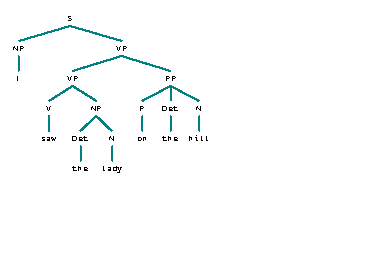

(S
  (NP I)
  (VP
    (V saw)
    (NP (NP (Det the) (N lady)) (PP (P on) (Det the) (N hill)))))


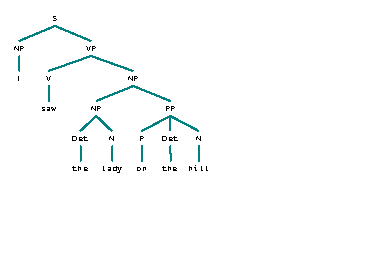

In [5]:
print_and_plot_trees(grammar_one, sentence_one)

### We ate octopus and shells for dinner.
Ambiguity consists of:
- for dinner as time (a formal evening meal)
- for dinner as meal (the meal you eat in the evening) 

but either way, it doesn't change the syntax.

In [6]:
sentence_two = 'We ate octopus and shells for dinner.'
sentence_two = sentence_two.rstrip('.')
sentence_two = sentence_two.split(' ')
sentence_two

['We', 'ate', 'octopus', 'and', 'shells', 'for', 'dinner']

In [7]:
grammar_two = nltk.CFG.fromstring("""
 S -> NP VP
 NP -> 'We' | N Conj N
 VP -> V NP PP
 PP -> P N
 P -> 'for'
 N -> 'octopus' | 'shells' | 'dinner'
 V -> 'ate'
 Conj -> 'and'
 """)

(S
  (NP We)
  (VP
    (V ate)
    (NP (N octopus) (Conj and) (N shells))
    (PP (P for) (N dinner))))


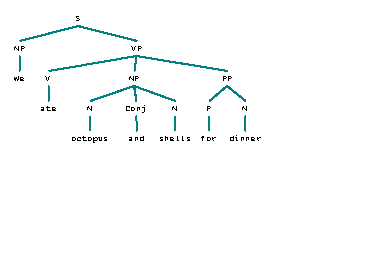

In [8]:
print_and_plot_trees(grammar_two, sentence_two)

### Anna and Peter saw us.

In [9]:
sentence_three = 'Anna and Peter saw us.'
sentence_three = sentence_three.rstrip('.')
sentence_three = sentence_three.split(' ')
sentence_three

['Anna', 'and', 'Peter', 'saw', 'us']

In [10]:
grammar_three = nltk.CFG.fromstring("""
 S -> NP VP
 NP -> N Conj N
 VP -> V NP
 N -> 'Anna' | 'Peter'
 V -> 'saw'
 Conj -> 'and'
 NP -> 'us'
 """)

(S (NP (N Anna) (Conj and) (N Peter)) (VP (V saw) (NP us)))


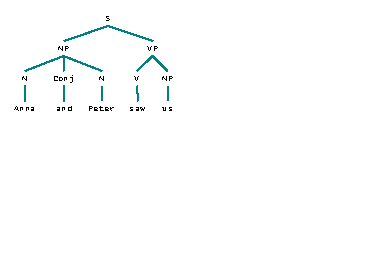

In [11]:
print_and_plot_trees(grammar_three, sentence_three)

### Getting grammars altogether

In [12]:
general_grammar = nltk.CFG.fromstring("""
 S -> NP VP
 NP -> Det N | 'I' | NP PP | 'We' | N Conj N | 'us'
 PP -> P Det N | P N
 VP -> V NP | VP PP
 Det -> 'the'
 N -> 'lady' | 'hill' | 'octopus' | 'shells' | 'dinner' | 'Anna' | 'Peter'
 V -> 'saw' | 'ate'
 P -> 'on' | 'for'
 Conj -> 'and'
 """)

(S
  (NP I)
  (VP
    (VP (V saw) (NP (Det the) (N lady)))
    (PP (P on) (Det the) (N hill))))


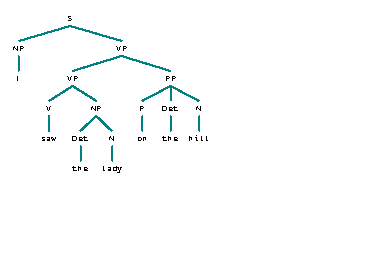

(S
  (NP I)
  (VP
    (V saw)
    (NP (NP (Det the) (N lady)) (PP (P on) (Det the) (N hill)))))


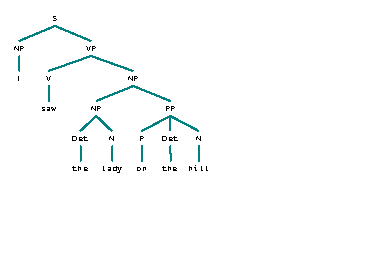

In [13]:
print_and_plot_trees(general_grammar, sentence_one)

(S
  (NP We)
  (VP
    (VP (V ate) (NP (N octopus) (Conj and) (N shells)))
    (PP (P for) (N dinner))))


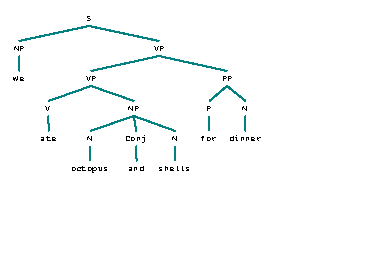

(S
  (NP We)
  (VP
    (V ate)
    (NP
      (NP (N octopus) (Conj and) (N shells))
      (PP (P for) (N dinner)))))


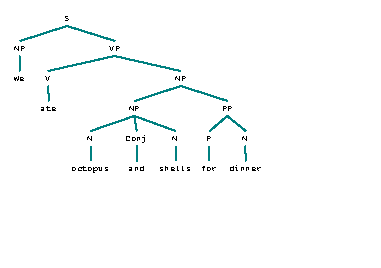

In [14]:
print_and_plot_trees(general_grammar, sentence_two)

(S (NP (N Anna) (Conj and) (N Peter)) (VP (V saw) (NP us)))


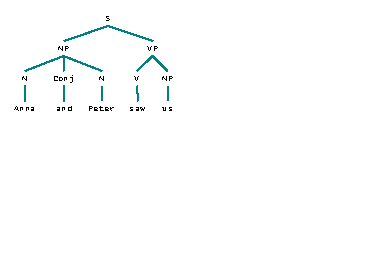

In [15]:
print_and_plot_trees(general_grammar, sentence_three)

## Exercitiul 3

In [16]:
first_dependency_grammar = nltk.DependencyGrammar.fromstring("""
    'saw' -> 'I' | 'lady' | 'on'
    'lady' -> 'the' | 'on'
    'on' -> 'hill'
    'hill' -> 'the'
""")
print(first_dependency_grammar)

Dependency grammar with 7 productions
  'saw' -> 'I'
  'saw' -> 'lady'
  'saw' -> 'on'
  'lady' -> 'the'
  'lady' -> 'on'
  'on' -> 'hill'
  'hill' -> 'the'


In [17]:
pdp = nltk.ProjectiveDependencyParser(first_dependency_grammar)
sent = 'I saw the lady on the hill.'.rstrip('.').split()
trees = pdp.parse(sent)
for tree in trees:
    print(tree)

(saw I (lady the (on (hill the))))
(saw I (lady the) (on (hill the)))


In [18]:
def print_and_plot_dependency(sentence: str):
    nlp = en_core_web_sm.load()
    # nlp function returns an object with individual token information, 
    # linguistic features and relationships
    doc = nlp(sentence)

    print ("{:<15} | {:<8} | {:<15} | {:<20}".format('Token','Relation','Head', 'Children'))
    print ("-" * 70)

    for token in doc:
      # Print the token, dependency nature, head and all dependents of the token
      print ("{:<15} | {:<8} | {:<15} | {:<20}"
             .format(str(token.text), str(token.dep_), str(token.head.text), str([child for child in token.children])))

     # Use displayCy to visualize the dependency 
    displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

In [19]:
for sentence in ['I saw the lady on the hill.', 'We ate octopus and shells for dinner.', 'Anna and Peter saw us.']:
    print('THE SENTENCE IS: {0}'.format(sentence))
    print_and_plot_dependency(sentence)
    print('\n\n')

THE SENTENCE IS: I saw the lady on the hill.
Token           | Relation | Head            | Children            
----------------------------------------------------------------------
I               | nsubj    | saw             | []                  
saw             | ROOT     | saw             | [I, lady, .]        
the             | det      | lady            | []                  
lady            | dobj     | saw             | [the, on]           
on              | prep     | lady            | [hill]              
the             | det      | hill            | []                  
hill            | pobj     | on              | [the]               
.               | punct    | saw             | []                  





THE SENTENCE IS: We ate octopus and shells for dinner.
Token           | Relation | Head            | Children            
----------------------------------------------------------------------
We              | nsubj    | ate             | []                  
ate             | ROOT     | ate             | [We, octopus, .]    
octopus         | dobj     | ate             | [and, shells]       
and             | cc       | octopus         | []                  
shells          | conj     | octopus         | [for]               
for             | prep     | shells          | [dinner]            
dinner          | pobj     | for             | []                  
.               | punct    | ate             | []                  





THE SENTENCE IS: Anna and Peter saw us.
Token           | Relation | Head            | Children            
----------------------------------------------------------------------
Anna            | nsubj    | saw             | [and, Peter]        
and             | cc       | Anna            | []                  
Peter           | conj     | Anna            | []                  
saw             | ROOT     | saw             | [Anna, us, .]       
us              | dobj     | saw             | []                  
.               | punct    | saw             | []                  
